# Rjesavanje jednadzbi za dobivanje prijenosne funkcije

Da bi smo dobili prijenosnu funkciju sustava potrebno je rjesiti sustav jednadzbi koje definiraju sustav, u elektrotehnici su to npr. jednadzbe dobivene metodom konturnih struji, napona cvorova ili nekom metodom koja opisuje strujno-naponske zavisnosti unutar sustava.

Python funkcije koje se koriste za ove operacije dio su ```Sympy``` knjiznice.
```python
* Eq
* solve_linear_system
* symbols
* Function
```

Za pocetak potrebno je obrisati sve varijable iz memorije.

In [1]:
import os
clear = lambda: os.system('cls')
clear()

0

Potom importati sve funkcije koje koristimo.

In [2]:
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from sympy import Eq, solve_linear_system, symbols, Function
from sympy.solvers import solve
import sympy as sp

### Primjer: Linearni elektricni sustav (Izvor: N.Stojkovic, N.Mijat - Teorija mreza i linija (Zbirka zadataka), zadatak 3.05)

Za pocetak je potrebno definirati sva imena matematickih varijabli koje koristimo kao Sympy simbole.

In [3]:
Uul, Uiz = symbols('Uul Uiz')
Z1, Z2 = symbols('Z1 Z2')
I1, I2 = symbols('I1 I2')
r = symbols('r')
Tf = symbols('Tf')
s = symbols('s')
L1, L2 = symbols('L1 L2')

1.) Postavimo jednadzbe koje opisuju sustav.

In [4]:
eq = Eq(Uul, I2*Z1 + Uiz + I2*Z2)
display(eq)

In [5]:
i2 = (1/r) * Uul
print('I2 =')
display(i2)

I2 =


Za supstituiranje I2 u gornjoj jednadzbi s izrazom za I2 potrebno je koristiti funkciju ```.subs()```

Funkcija ```.subs()``` kao argument ima varijablu koju supstituiramo te izraz koji unosi ta supstitucija.
Simbol (Matematicka varijabla) i python varijabla ne smiju imati isto ime, no ukoliko nam je simbol ```I2```, a python varijabla ```i2``` tada mozemo supstituirati simbol s izrazom za ```I2``` koji je spremljen kao python varijabla ```i2```.
Iz tog razloga je gornja jednadzba zapisana kao ```i2=...``` a ne ```I2=...```.

```.subs(VARIJABLA, IZRAZ)```, u ovom slucaju:

In [6]:
eq = eq.subs(I2, i2)
display(eq)

Isto smo mogli napraviti s:

```python
eq = eq.subs(I2, (1/r) * Uul)
```


jer je u memoriji racunala (1/r) * Uul spremljeno kao i2.

Sada kada smo dobili izraz iz kojeg mozemo izluciti ```Uul``` te ```Uiz```, samim time dobiti prijenosnu funkciju ```Tf = Uiz/Uul``` potrebno je rjesiti jednadzbu za varijablu ```Uul``` uz pomoc funkcije ```solve()```, to ce nam dati izraz u obliku ```Uul = ...```

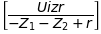

In [7]:
Uul = solve(eq, Uul)
display(Uul)

Vidimo da je zapis u obliku matrice, s matricom ne mozemo raditi daljnje potrebne operacije stoga je potrebno izvuci izraz iz matrice i spremiti ga u "obicnu" varijablu.
Kako je ovo matrica samo s jednim poljem dovoljno je napraviti sljedece:

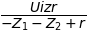

In [8]:
Uul = Uul[0]
display(Uul)

Sada kada imamo definiran izraz za ```Uul``` mozemo jednostavno definirati ```Tf``` kao ```Uiz/Uul``` te dobiti prijenosnu funkciju.

In [9]:
Tf = Uiz/Uul
display(Tf)

```Z1``` i ```Z2``` mozemo supstituirati kao ```sL1``` i ```sL2``` putem funkcije ```.subs()``` kao u ranijem koraku.

In [10]:
Tf = Tf.subs(Z1, s*L1)
Tf = Tf.subs(Z2, s*L2)
display(Tf)

Potom vrijednosti ```L1```, ```L2``` i ```r``` mozemo unositi istim postupkom supstitucije, npr. ```L1=2```, ```L2=3```, ```r=1/2```

In [11]:
Tf = Tf.subs(L1, 2)
Tf = Tf.subs(L2, 3)
Tf = Tf.subs(r, 1/2)
display(Tf)

Isto smo mogli napraviti na nacin:
```python
l1 = 2
l2 = 3
R = 1/2
Tf = Tf.subs(L1, l1)
Tf = Tf.subs(L2, l2)
Tf = Tf.subs(r, R)
display(Tf)
```

### Primjer: Linearni elektricni sustav (sustav vise linearnih jednadzbi)

In [13]:
from sympy import linsolve

In [14]:
U1, U2 = symbols('U1 U2')
I1, I2 = symbols('I1 I2')
Tf = symbols('Tf')
s = symbols('s')
R, L, C = symbols('R L C')

In [15]:
eq1 = Eq(I1*(R+s*L+(1/(s*C)))-I2*(1/(s*C)), U1)
eq2 = Eq(I2*(1/(s*C))-I1*(1/(s*C)), U2)

display(eq1)
display(eq2)

Za supstituiranje dobro je koristiti ime varijable s malim slovom, jer ako se matematicka i python varijabla zovu isto ne moze se supstituirati izravno .subs() funkcijom u obliku eq=eq.subs(I2, I2), no oblik eq=eq.subs(I2, i2) nam daje zeljeni rezultat.

In [16]:
i2 = solve(eq2, I2)
i2 = i2[0]
display(i2)

In [17]:
eq11 = eq1.subs(I2, i2)
display(eq11)

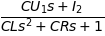

In [18]:
i1 = solve(eq1, I1)
i1 = i1[0]
display(i1)